In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2, 
                                        zoom_range=0.2,
                                        horizontal_flip=True)
x_train = train_datagen.flow_from_directory(
        'dataset/train',
        target_size = (32,32),
        # color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 60 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(32,32),
        batch_size=4,
        # color_mode="grayscale",
        class_mode='binary')

Found 60 images belonging to 2 classes.


In [5]:
vgg = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1,
    classifier_activation="softmax",
)

In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
x = tf.keras.layers.GlobalMaxPooling2D()(vgg.output)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # create a model object
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)

# # view the structure of the model
model.summary()

# # tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [8]:
history = model.fit(
  x_train,
  validation_data=x_test,
  epochs=35,
)

Epoch 1/35
15/15 [==============================] - 3s 115ms/step - loss: 0.7839 - accuracy: 0.5000 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 2/35
15/15 [==============================] - 2s 99ms/step - loss: 0.7212 - accuracy: 0.5000 - val_loss: 0.6746 - val_accuracy: 0.5333
Epoch 3/35
15/15 [==============================] - 2s 103ms/step - loss: 0.7071 - accuracy: 0.4333 - val_loss: 0.6702 - val_accuracy: 0.7000
Epoch 4/35
15/15 [==============================] - 2s 106ms/step - loss: 0.7028 - accuracy: 0.4333 - val_loss: 0.6742 - val_accuracy: 0.6000
Epoch 5/35
15/15 [==============================] - 1s 98ms/step - loss: 0.6833 - accuracy: 0.5667 - val_loss: 0.6772 - val_accuracy: 0.6167
Epoch 6/35
15/15 [==============================] - 1s 97ms/step - loss: 0.6890 - accuracy: 0.5500 - val_loss: 0.6860 - val_accuracy: 0.5667
Epoch 7/35
15/15 [==============================] - 1s 96ms/step - loss: 0.6874 - accuracy: 0.4833 - val_loss: 0.6905 - val_accuracy: 0.5333
Epoch 8/35

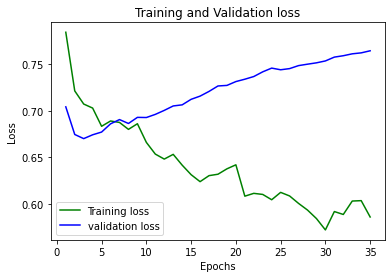

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

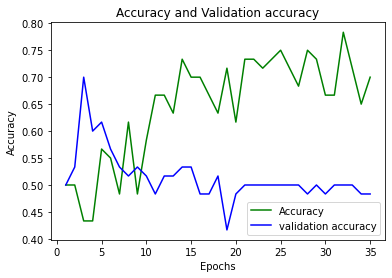

In [10]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()